In [1]:
import keras
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 20

# dimension
rows, columns = 28, 28

# Load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape data as Keras's required format
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, rows, columns)
    X_test = X_test.reshape(X_test.shape[0], 1, rows, columns)
    input_shape = (1, rows, columns)
else:
    X_train = X_train.reshape(X_train.shape[0], rows, columns, 1)
    X_test = X_test.reshape(X_test.shape[0], rows, columns, 1)
    input_shape = (rows, columns, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('Train samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

# One hot encoding label Y (convert class vectors to binary class matrices)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# Define the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(36, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

# Train model with data
H = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Using Theano backend.


X_train shape: (60000, 28, 28, 1)
Train samples: 60000
Test samples: 10000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               211800    
_____________________________________________

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.3494 - accuracy: 0.8902 - val_loss: 0.0660 - val_accuracy: 0.9768
Epoch 2/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0869 - accuracy: 0.9765 - val_loss: 0.0514 - val_accuracy: 0.9829
Epoch 3/20
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 4/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0502 - accuracy: 0.9862 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 5/20
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0416 - accuracy: 0.9887 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 6/20
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.0272 - val_accuracy: 0.9906
Epoch 7/20
60000/60000 [==============================] - 114s 

Test loss: 4.0889969301866795
Test accuracy: 99.04000163078308


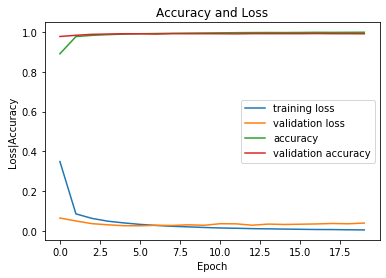

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# Evaluate model with test set
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               211800    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [4]:
from datetime import date
today = date.today().strftime('%Y%m%d')
model_name = 'LeNET_model_for_MNIST_padding_same_'+str(today)+'.h5'
print(model_name)

model.save(model_name)
print("Saved model to disk")

LeNET_model_for_MNIST_padding_same_20200523.h5
Saved model to disk
